In [136]:
# Load required libraries

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


## 1. Data treatment and exploration

In [138]:
AEdata = pd.read_csv("cleaned_AE_data.csv")

In [139]:
AEdata.head()

,Period,Type 1 Departments - Major A&E,Type 2 Departments - Single Specialty,Type 3 Departments - Other A&E/Minor Injury Unit,Total Attendances,Emergency Admissions via Type 1 A&E,Emergency Admissions via Type 2 A&E,Emergency Admissions via Type 3 and 4 A&E,Total Emergency Admissions via A&E,Other Emergency Admissions (i.e not via A&E),Total Emergency Admissions,Number of patients spending >4 hours from decision to admit to admission,Number of patients spending >12 hours from decision to admit to admission
0,2010-08-01,1.138652e+06,54371.000000,559358.000000,1.752381e+06,287438.000000,5367.000000,8081.000000,300886.000000,124816.000000,425702.000000,3697.000000,1.0
1,2010-09-01,1.150728e+06,55181.000000,550359.000000,1.756268e+06,293991.000000,5543.000000,3673.000000,303207.000000,121693.000000,424900.000000,5907.000000,0.0
2,2010-10-01,1.163143e+06,54961.000000,583244.000000,1.801348e+06,303452.000000,5485.000000,2560.000000,311497.000000,124718.000000,436215.000000,6932.000000,0.0
3,2010-11-01,1.111295e+06,53727.428571,486005.428571,1.651027e+06,297832.000000,5731.142857,3279.000000,306842.142857,122256.857143,429099.000000,7179.000000,2.0
4,2010-12-01,1.159204e+06,45536.428571,533000.857143,1.737741e+06,318602.428571,6277.000000,3198.428571,328077.857143,124650.857143,452728.714286,13818.142857,15.0


### 3. Transform datetime information into the index instead

In [140]:
AEdata['Period'] = pd.to_datetime(AEdata['Period'])

In [141]:
AEdata = AEdata.set_index('Period')

In [142]:
AEdata.columns

Index(['Type 1 Departments - Major A&E',
       'Type 2 Departments - Single Specialty',
       'Type 3 Departments - Other A&E/Minor Injury Unit', 'Total Attendances',
       'Emergency Admissions via Type 1 A&E',
       'Emergency Admissions via Type 2 A&E',
       'Emergency Admissions via Type 3 and 4 A&E',
       'Total Emergency Admissions via A&E',
       'Other Emergency Admissions (i.e not via A&E)',
       'Total Emergency Admissions',
       'Number of patients spending >4 hours from decision to admit to admission',
       'Number of patients spending >12 hours from decision to admit to admission'],
      dtype='object')

### 4. I will choose to model total Emergency admissions. I choose this metric as it might be more stable for later modelling

In [143]:
Emergency_admissions = AEdata['Total Emergency Admissions']

In [144]:
Emergency_admissions.head()

Period
2010-08-01    425702.000000
2010-09-01    424900.000000
2010-10-01    436215.000000
2010-11-01    429099.000000
2010-12-01    452728.714286
Name: Total Emergency Admissions, dtype: float64

In [145]:
len(Emergency_admissions)

120

## 5. Split main dataset into Train Validation and Hold subsets of data
## Train (70%, 84), Validation (20%, 24), Hold (10%, 12). Total rows 120

In [146]:
# Training dataset (70%, 84)
traindata = Emergency_admissions.iloc[0:84]

In [147]:
# Validation dataset (20%, 24)
valdata = Emergency_admissions.iloc[83:108]

In [148]:
# Hold dataset (10%, 12)
hold = Emergency_admissions[107:115]

In [149]:
len(traindata)

84

In [150]:
len(valdata)

25

In [151]:
len(hold)

8

In [152]:
type(traindata)

pandas.core.series.Series

## 6.Transform Series objects to dataframe objects 

In [153]:
traindataf = traindata.to_frame().apply(np.int64)

In [154]:
# Renmae variable now as a dataframe
traindataf.rename(columns={'Total Emergency Admissions':'Emadmissions'})

,Emadmissions
Period,
2010-08-01,425702
2010-09-01,424900
2010-10-01,436215
2010-11-01,429099
2010-12-01,452728
...,...
2017-03-01,509805
2017-04-01,471328
2017-05-01,505843


In [155]:
traindataf.head()

,Total Emergency Admissions
Period,
2010-08-01,425702
2010-09-01,424900
2010-10-01,436215
2010-11-01,429099
2010-12-01,452728


In [156]:
valdataf = valdata.to_frame().apply(np.int64)

In [157]:
valdataf.rename(columns={'Total Emergency Admissions':'Emadmissions'})

,Emadmissions
Period,
2017-07-01,499259
2017-08-01,486074
2017-09-01,486799
2017-10-01,513217
2017-11-01,513019
2017-12-01,520803
2018-01-01,526045
2018-02-01,476867
2018-03-01,526066


In [158]:
holdf = hold.to_frame().apply(np.int64)

In [159]:
holdf.rename(columns={'Total Emergency Admissions':'Emadmissions'})

,Emadmissions
Period,
2019-07-01,554069
2019-08-01,529231
2019-09-01,529903
2019-10-01,563133
2019-11-01,559556
2019-12-01,560795
2020-01-01,559058
2020-02-01,510811


In [160]:
# LENGTH of renamed TRAIN dataset
len(traindataf)


84

In [161]:
len(valdataf)


25

In [162]:
len(holdf)

8

## 7. Combine Train and Validation datasets data 

In [163]:
Trainval = traindataf.append(valdataf,ignore_index=True)

## 8 Plot all three datasets Train, Validation and hold datasets 

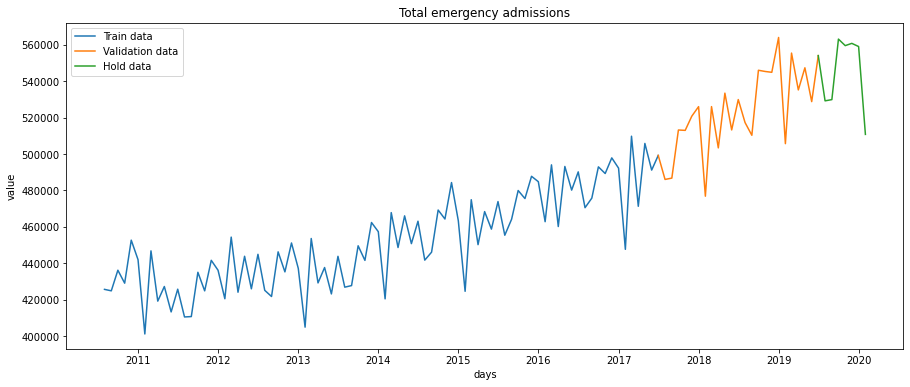

In [164]:
plt.figure(figsize=(15,6))
plt.title('Total emergency admissions')
plt.plot(traindataf, label = "Train data")
plt.plot(valdataf, label = "Validation data")
plt.plot(holdf, label = "Hold data")
plt.legend()
plt.ylabel("value")
plt.xlabel("days")
plt.show()

## 9.  ACF and PACF plots to determine (P,Q) values in the ARIMA(P,D,Q) model

In [165]:
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots

In [166]:
type(traindataf)

pandas.core.frame.DataFrame

### We differentiate the data using .diff() function

In [167]:
# We differentiate the data using .diff() function
# Use it on train_ARIMA_input dataset
# .dropna() Use the dropna() in the diff() data step as this is the step that was producing the null values 
Diff_01 = traindataf.diff().dropna()

# ACF plot on the train dataset  (Q)

In [168]:
# ACF plot on the train dataset.  ACF plots provide Q parameter

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


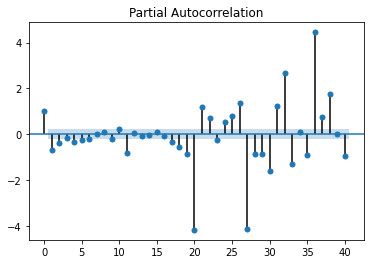

In [169]:
FigPACF = tsaplots.plot_pacf(Diff_01,lags=40)

In [170]:
# PACF plot on the train dataset (P)

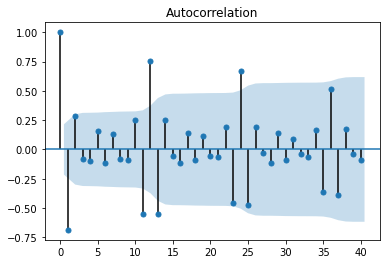

In [171]:
FigACF = tsaplots.plot_acf(Diff_01,lags=40)

## 10. Dichkey Fuller test on first differienced train dataset (Emergency Admissions)

In [172]:
from statsmodels.tsa.stattools import adfuller
X = Diff_01
result = adfuller(X)
print(f'pvalue: {result[1]}')

pvalue: 0.002179655707338722


### Interpretation, as the Dickey-Filler test shows p-value < 0.05 then we reject null hypothesis, so the data IS STATIONARY on the first difference

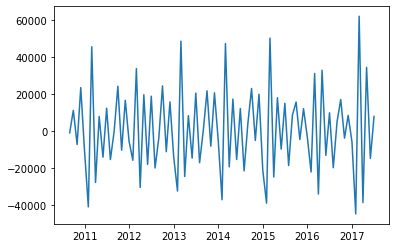

In [173]:
plt.plot(Diff_01)

## 11. Fit an auto-arima model on the TRAIN data 

In [174]:
# 2.1 Install required packages
! pip install pmdarima

In [175]:
# 2.2 Import arima module
import pmdarima as pm

###  11.1 Create an auto-arima model based on Train data 

In [176]:
# Copy original traindata dataset
trainARIMA = traindataf

In [177]:
ARIMA_model = pm.auto_arima(trainARIMA)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [178]:
trainARIMA.rename(columns={'Total Emergency Admissions':'Emadmissions'})

,Emadmissions
Period,
2010-08-01,425702
2010-09-01,424900
2010-10-01,436215
2010-11-01,429099
2010-12-01,452728
...,...
2017-03-01,509805
2017-04-01,471328
2017-05-01,505843


###  11.2 Fit an ARIMA model based on Train dataset

In [179]:
ARIMA_model = pm.auto_arima(trainARIMA)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### 11.3 Forecast some values into the future that matches length of Validation datsaet 

In [180]:
forecast = pd.Series(ARIMA_model.predict(len(valdataf)), index = valdataf.index)

In [181]:
### 11.4 Plot forecast against actual values (train actual and forecast against validation dataset ) 

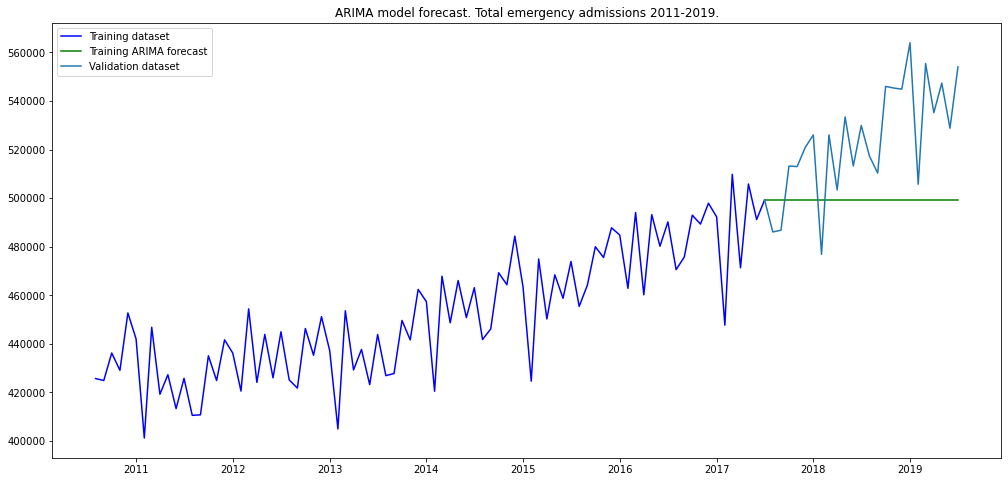

In [237]:
plt.figure(figsize=(17,8))
plt.title('ARIMA model forecast. Total emergency admissions 2011-2019.')
plt.plot(trainARIMA, c='blue',label = "Training dataset")
plt.plot(forecast, c='green',label="Training ARIMA forecast")
plt.plot(valdataf, label = "Validation dataset")
plt.legend()
plt.show()


### 5. Compute MAPE value

In [207]:
type(valdataf)

pandas.core.frame.DataFrame

In [208]:
type(forecast)

pandas.core.series.Series

In [209]:
valdataf.head()

,Total Emergency Admissions
Period,
2017-07-01,499259
2017-08-01,486074
2017-09-01,486799
2017-10-01,513217
2017-11-01,513019


In [210]:
forecast.head()

Period
2017-07-01    499259.0
2017-08-01    499259.0
2017-09-01    499259.0
2017-10-01    499259.0
2017-11-01    499259.0
dtype: float64

In [211]:
### 5.1 Rename from ValdataNEW  datarame  as Value

In [212]:
ValdataNEW = valdataf.rename(columns={'Total Emergency Admissions':'Value'})

In [213]:
### 5.2 Rename forecast Serie as Value and conver it into a Pandas dataframe

In [214]:
forecsatRENAME = forecast.rename('Value')

In [215]:
### 5.3 Convert Forecast output into a Dataframe and rename column as "Value"
ForecastNEW = pd.DataFrame(forecsatRENAME)


In [216]:
## Check output

In [217]:
ValdataNEW.head()

,Value
Period,
2017-07-01,499259
2017-08-01,486074
2017-09-01,486799
2017-10-01,513217
2017-11-01,513019


In [218]:
ForecastNEW.head()

,Value
Period,
2017-07-01,499259.0
2017-08-01,499259.0
2017-09-01,499259.0
2017-10-01,499259.0
2017-11-01,499259.0


In [223]:
type(ValdataNEW)

pandas.core.frame.DataFrame

In [224]:
type(ForecastNEW)

pandas.core.frame.DataFrame

In [ ]:
### 5.4 Build the MAPE function based on Dataframes

In [233]:
def accuracy_MAPE(ACT,FCAST):
    Value_percent = (abs((ACT-FCAST)/ACT).sum()/len(ACT))*100
    Mape_value = print(f"Auto ARIMA model MAPE value in percent   {Value_percent}")
    return Mape_value

In [234]:
accuracy_MAPE(ValdataNEW,ForecastNEW)

Auto ARIMA model MAPE value in percent   Value    5.214388
dtype: float64
